# Unemployment Analysis in India During the COVID-19 Pandemic  

Unemployment, a key macroeconomic indicator, is quantified through the unemployment rate, which represents the proportion of individuals without work relative to the total labor force. The COVID-19 pandemic triggered a significant disruption in labor markets worldwide, and India was no exception. A notable spike in unemployment rates was observed during this period, underscoring the pandemic's profound socio-economic impact.  

This analysis aims to explore the pandemic's implications for employment dynamics in India through an in-depth examination of state-wise unemployment trends using Python.  

### Objective:  

The primary goal is to evaluate the multi-faceted impact of the COVID-19 crisis on employment across India. The dataset under consideration provides a granular view of unemployment metrics, revealing temporal trends and variations across states. Key indicators such as unemployment rates, employment figures, and labor force participation are analyzed to assess the pandemic's effects on the nation's workforce and broader labor market.  

### Dataset Description:  

The dataset offers a comprehensive state-wise and temporal breakdown of India's labor market statistics during the pandemic. Its key features include:  

1. **States**: The geographical units of analysis, representing India's diverse federal structure.  
2. **Date**: Specific timestamps corresponding to recorded unemployment data.  
3. **Measurement Frequency**: The periodicity of data collection (monthly).  
4. **Estimated Unemployment Rate (%)**: A measure of the proportion of unemployed individuals in the labor force for each state.  
5. **Estimated Employment Figures**: The number of individuals actively employed.  
6. **Estimated Labor Participation Rate (LPR) (%)**: The percentage of the working-age population (16-64 years) engaged in the labor market, either through employment or active job-seeking.  

### Analysis Focus:  

The dataset enables a deep dive into the geographic and temporal disparities in employment outcomes during the pandemic. By examining key labor market metrics, the analysis uncovers patterns and anomalies in unemployment rates and labor force participation across different states and over time.  

This analysis will offer insights into:  

- State-specific employment challenges during COVID-19.  
- The interplay between unemployment rates, labor force participation, and employment figures.  
- Broader socio-economic ramifications of the pandemic on India’s workforce.  

By leveraging Python for data analysis and visualization, this study aims to generate actionable insights into the pandemic-induced shifts in India’s labor landscape, supporting policymakers and stakeholders in formulating data-driven interventions.


In [15]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar 
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Load the csv file into pandas dataframe

In [16]:
df = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [17]:
df.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855
266,West Bengal,31-10-2020,M,9.98,33962549,45.63,East,22.9868,87.855


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [19]:
df.describe(include='all')

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
count,267,267,267,267.000000,2.670000e+02,267.000000,267,267.000000,267.000000
unique,27,10,1,NaN,NaN,NaN,5,NaN,NaN
top,Andhra Pradesh,31-05-2020,M,NaN,NaN,NaN,North,NaN,NaN
freq,10,27,267,NaN,NaN,NaN,79,NaN,NaN
mean,NaN,NaN,NaN,12.236929,1.396211e+07,41.681573,NaN,22.826048,80.532425
std,NaN,NaN,NaN,10.803283,1.336632e+07,7.845419,NaN,6.270731,5.831738
min,NaN,NaN,NaN,0.500000,1.175420e+05,16.770000,NaN,10.850500,71.192400
25%,NaN,NaN,NaN,4.845000,2.838930e+06,37.265000,NaN,18.112400,76.085600
50%,NaN,NaN,NaN,9.650000,9.732417e+06,40.390000,NaN,23.610200,79.019300
75%,NaN,NaN,NaN,16.755000,2.187869e+07,44.055000,NaN,27.278400,85.279900


# Dataset Overview

The dataset contains **267 entries** and **9 columns**. Below is a summary of the columns:

- **Region**: Names of regions (e.g., Andhra Pradesh).
- **Date**: The dates for the unemployment data.
- **Frequency**: Frequency of the data (all values are "M" for monthly).
- **Estimated Unemployment Rate (%)**: Unemployment rate as a percentage.
- **Estimated Employed**: Number of employed individuals.
- **Estimated Labour Participation Rate (%)**: Labour participation rate as a percentage.
- **Region.1**: A classification of regions (e.g., South, North).
- **Longitude**: Longitude coordinates of the regions.
- **Latitude**: Latitude coordinates of the regions.


# Key Observations

- The dataset spans **27 unique regions** and **10 unique dates**.
- The unemployment rate ranges from **0.5% to 75.85%**.
- The dataset is organized **geographically** and **temporally**, allowing for **trend analysis** and **regional comparisons**.


### Renaming the attributes
1. Region = state
2. Date = date
3. Frequency = frequency
4. Estimated Unemployment Rate (%) = estimated unemployment rate
5. Estimated Employed = estimated employment
6. Estimated Labour Participation Rate (%) = estimated labour participation rate
7. Region.1 = region
8. longitude = longitude
9. latitude = latitude


### Updating column names:

In [20]:
df.columns = ['state','date','frequency','estimated unemployment rate','estimated employed','estimated labour participation rate','region','longitude','latitude']
df.head()

,state,date,frequency,estimated unemployment rate,estimated employed,estimated labour participation rate,region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


### Revealing basic information of the dataset

In [21]:
df.shape

(267, 9)

In [22]:
df.columns

Index(['state', 'date', 'frequency', 'estimated unemployment rate',
       'estimated employed', 'estimated labour participation rate', 'region',
       'longitude', 'latitude'],
      dtype='object')

In [23]:
df.isnull().sum()

state                                  0
date                                   0
frequency                              0
estimated unemployment rate            0
estimated employed                     0
estimated labour participation rate    0
region                                 0
longitude                              0
latitude                               0
dtype: int64

In [24]:
df.duplicated().any()

np.False_

In [25]:
df.state.value_counts()

state
Andhra Pradesh      10
Assam               10
Bihar               10
Chhattisgarh        10
Delhi               10
Goa                 10
Gujarat             10
Haryana             10
Himachal Pradesh    10
Jharkhand           10
Karnataka           10
Rajasthan           10
Kerala              10
Madhya Pradesh      10
Maharashtra         10
Meghalaya           10
Odisha              10
Puducherry          10
Punjab              10
Uttarakhand         10
Tamil Nadu          10
Telangana           10
Tripura             10
West Bengal         10
Uttar Pradesh       10
Jammu & Kashmir      9
Sikkim               8
Name: count, dtype: int64

### Changing the datatype of 'date' from object to datetime

In [26]:
df['date'] = pd.to_datetime(df['date'],dayfirst = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   state                                267 non-null    object        
 1   date                                 267 non-null    datetime64[ns]
 2   frequency                            267 non-null    object        
 3   estimated unemployment rate          267 non-null    float64       
 4   estimated employed                   267 non-null    int64         
 5   estimated labour participation rate  267 non-null    float64       
 6   region                               267 non-null    object        
 7   longitude                            267 non-null    float64       
 8   latitude                             267 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 18.9+ KB


### Extracting month from date attribute

In [27]:
df['month_int'] = df['date'].dt.month
df.head()

,state,date,frequency,estimated unemployment rate,estimated employed,estimated labour participation rate,region,longitude,latitude,month_int
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5


The months are in integer datetype. We need to convert the months into words for better analysis,

In [56]:
df['month'] = df['month_int'].apply(lambda x: calendar.month_abbr[x])
df.head()

,state,date,frequency,estimated unemployment rate,estimated employed,estimated labour participation rate,region,longitude,latitude,month_int,month
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,May


Numeric data grouped by months

In [57]:
data = df.groupby(['month'])[['estimated unemployment rate','estimated employed','estimated labour participation rate']].mean()
data=pd.DataFrame(data).reset_index()

Bar plot of unemployment rate and labour participation rate

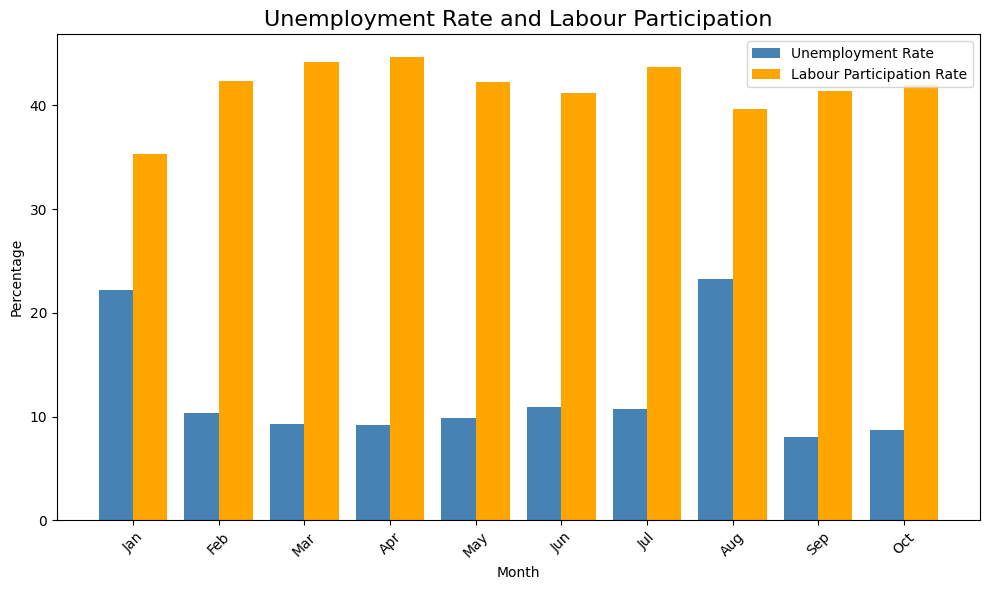

In [58]:
month = data.month
unemployment_rate = data['estimated unemployment rate']
labour_participation_rate = data['estimated labour participation rate']
estimated_employed = data['estimated employed']

# Define the months in order
ordered_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']
month_order = {month: i for i, month in enumerate(ordered_months)}
data['month_order'] = data['month'].map(month_order)
data = data.sort_values('month_order')  # Ensure months are in order

# Extract ordered values
ordered_month = data['month']

# Bar chart parameters
x = np.arange(len(ordered_month))  # X-axis positions
width = 0.4  # Bar width

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Add bars for unemployment rate
ax.bar(x - width/2, unemployment_rate, width, label='Unemployment Rate', color='steelblue')

# Add bars for labour participation rate
ax.bar(x + width/2, labour_participation_rate, width, label='Labour Participation Rate', color='orange')

# Add labels, title, and legend
ax.set_title('Unemployment Rate and Labour Participation', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(ordered_month, rotation=45)
ax.set_xlabel('Month')
ax.set_ylabel('Percentage')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [31]:
month = data.month
unemployment_rate = data['estimated unemployment rate']
labour_participation_rate = data['estimated labour participation rate']

fig = go.Figure()

fig.add_trace(go.Bar(x = month,y = unemployment_rate,name = 'Unemployment Rate'))
fig.add_trace(go.Bar(x = month,y = labour_participation_rate,name = 'Labour Participation Rate'))

Bar plot of estimated employed citizen in every month

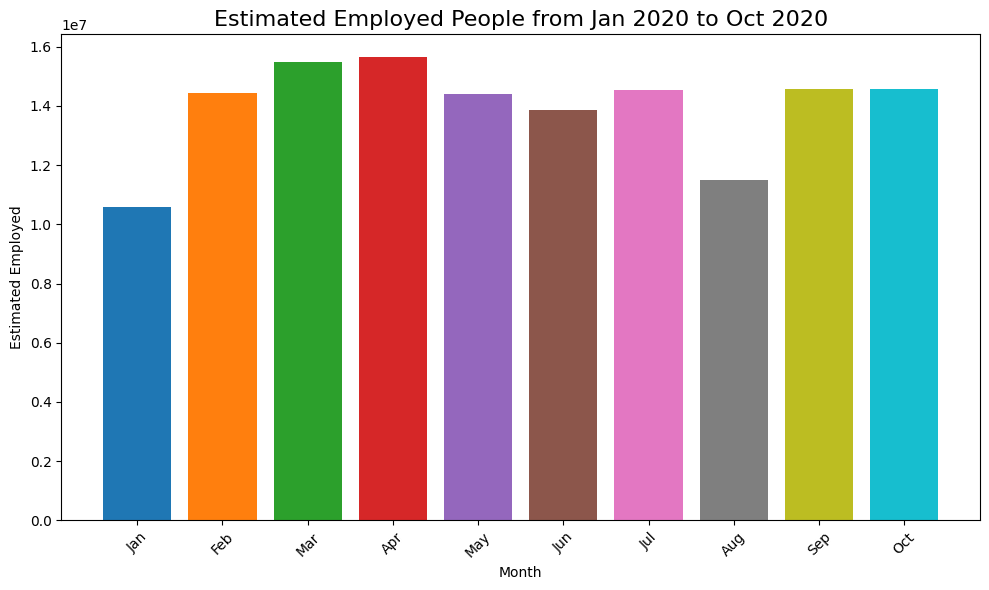

In [32]:
plt.figure(figsize=(10, 6))
bars = plt.bar(ordered_month, estimated_employed, color=plt.cm.get_cmap('tab10', len(ordered_month))(np.arange(len(ordered_month))))

# Adding labels and title
plt.title('Estimated Employed People from Jan 2020 to Oct 2020', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Estimated Employed')
plt.xticks(rotation=45)  # Rotate month labels for better readability

# Show plote from Jan 2020 to Oct 2020')
plt.tight_layout()
plt.show()


In [59]:
import plotly.express as px

In [34]:
fig = px.bar(data,x='month',y='estimated employed',color='month',
            category_orders ={'month':['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']},
            title='Estimated employed people from Jan 2020 to Oct 2020')
fig.show()

## State wise Analysis

In [35]:
state =  df.groupby(['state'])[['estimated unemployment rate','estimated employed','estimated labour participation rate']].mean()
state = pd.DataFrame(state).reset_index()

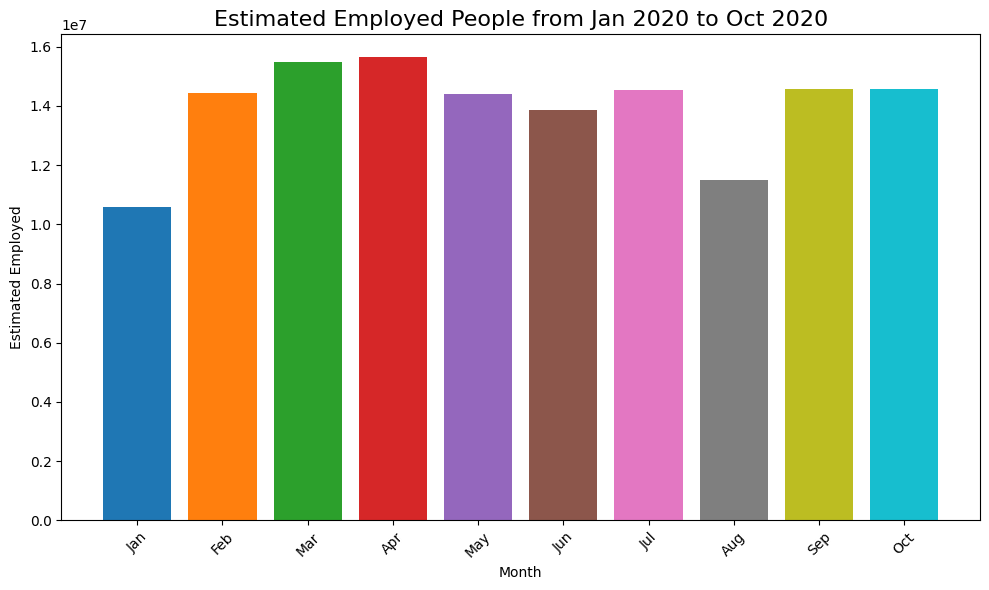

In [36]:
plt.figure(figsize=(10, 6))
bars = plt.bar(ordered_month, estimated_employed, color=plt.cm.get_cmap('tab10', len(ordered_month))(np.arange(len(ordered_month))))

# Adding labels and title
plt.title('Estimated Employed People from Jan 2020 to Oct 2020', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Estimated Employed')
plt.xticks(rotation=45)  # Rotate month labels for better readability

# Show plot
plt.tight_layout()
plt.show()

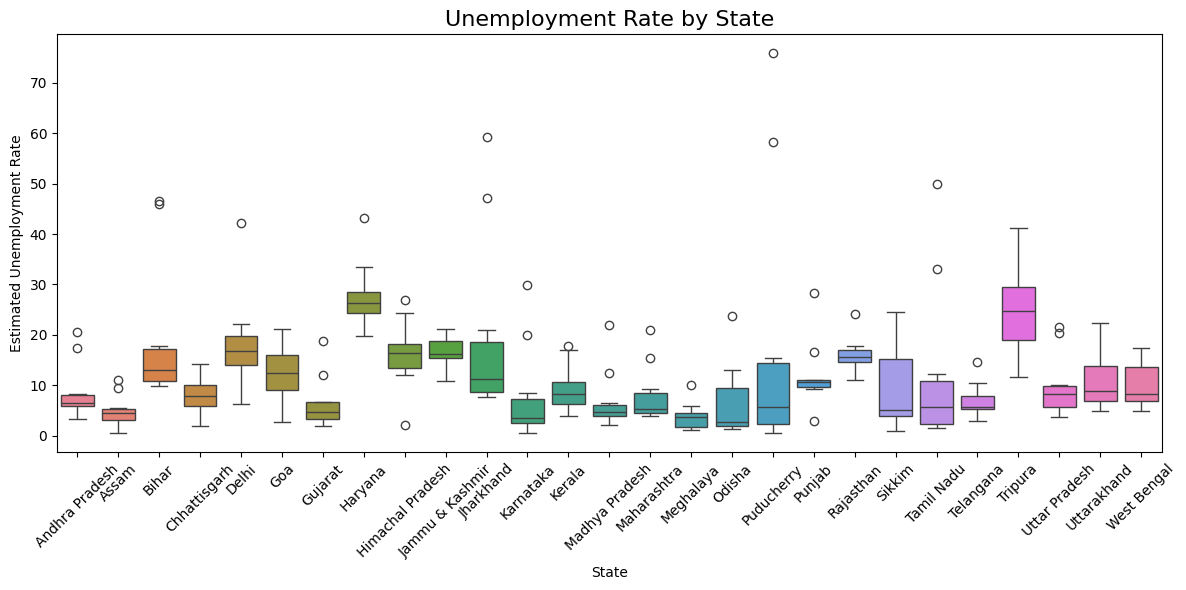

In [37]:
# Box plot using Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='state', y='estimated unemployment rate', hue='state')

# Adding title and labels
plt.title('Unemployment Rate by State', fontsize=16)
plt.xlabel('State')
plt.ylabel('Estimated Unemployment Rate')

# Display the plot
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.tight_layout()
plt.show()

In [38]:
# Box plot
plt.tight_layout()
fig = px.box(data_frame=df,x='state',y='estimated unemployment rate',color='state',title='Unemployment rate')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

<Figure size 640x480 with 0 Axes>

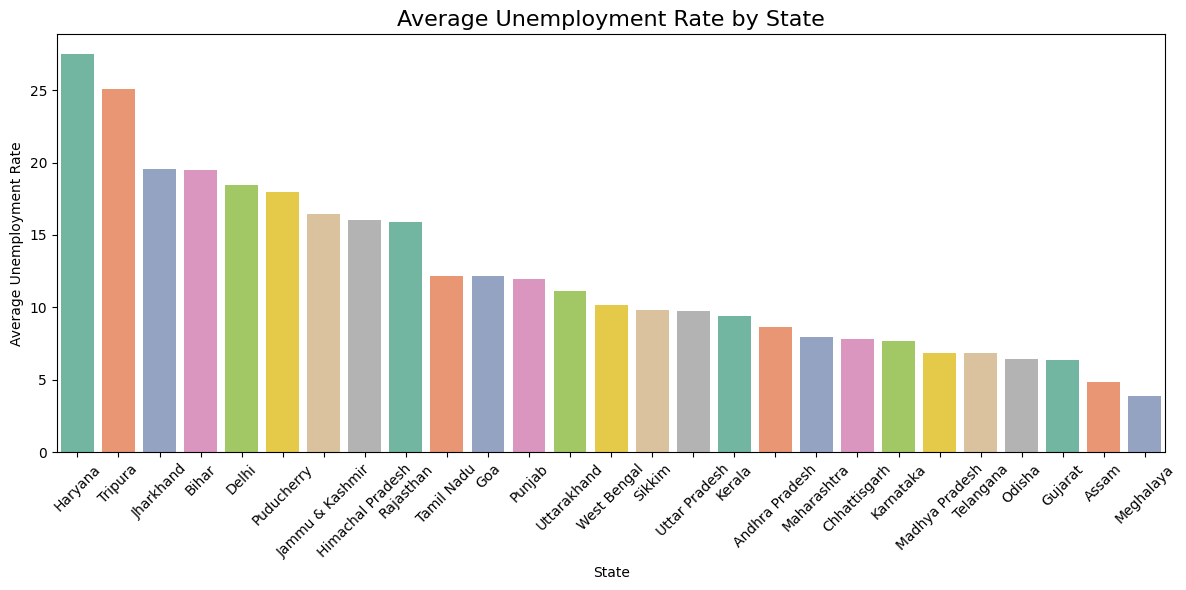

In [39]:
avg_unemployment_rate = state.groupby('state')['estimated unemployment rate'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_unemployment_rate.index, y=avg_unemployment_rate.values, palette='Set2')

# Adding title and labels
plt.title('Average Unemployment Rate by State', fontsize=16)
plt.xlabel('State')
plt.ylabel('Average Unemployment Rate')

# Rotate x-axis labels for better readability if necessary
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

In [40]:
# average unemployment rate bar plot

fig = px.bar(state,x='state',y='estimated unemployment rate',color='state',title='Average unemployment rate (State)')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

>  Hariyana and  Tripura were having the highest average amount of Unemployment rate




> Meghalaya was having the lowest average amount of Unemployment rate

In [41]:
# Bar plot Unemployment Rate (monthly)

fig = px.bar(df,x='state',y='estimated unemployment rate',animation_frame='month',color='state',
            title='Unemployment rate from Jan 2020 to Oct 2020(State)')

fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()


**Monthly unemployment rate**

In [42]:
fig=px.scatter_geo(df,'longitude','latitude',color='state',
                  hover_name='state',size='estimated unemployment rate',
                  animation_frame='month',scope='asia',title='Impact of lockdown on employment in India')

fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] =2000
fig.update_geos(lataxis_range=[5,40],lonaxis_range=[65,100],oceancolor='lightblue',
               showocean=True)

fig.show()

## Regional Analysis

In [43]:
df.region.unique()

array(['South', 'Northeast', 'East', 'West', 'North'], dtype=object)

In [44]:
# numeric data grouped by region

region = df.groupby(['region'])[['estimated unemployment rate','estimated employed','estimated labour participation rate']].mean()
region = pd.DataFrame(region).reset_index()

<Figure size 1200x800 with 0 Axes>

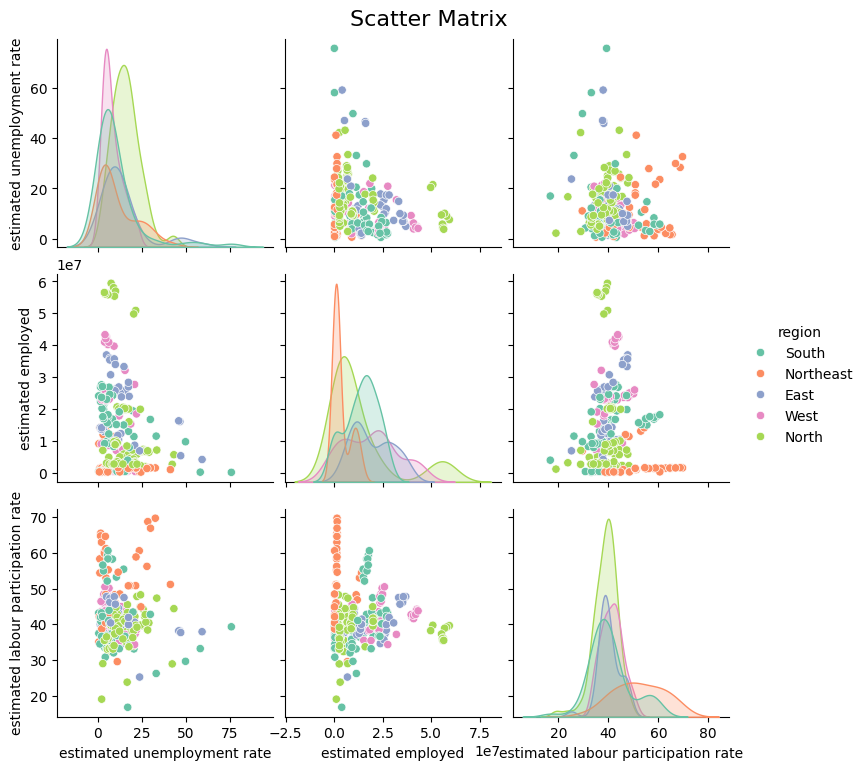

In [45]:
# Scatter matrix using Seaborn
plt.figure(figsize=(12, 8))

# Creating a pair plot
pair_plot = sns.pairplot(
    df,
    vars=['estimated unemployment rate', 'estimated employed', 'estimated labour participation rate'],
    hue='region',
    palette='Set2',
    diag_kind='kde'  # Use KDE plots for the diagonal
)

# Adding a title
pair_plot.fig.suptitle("Scatter Matrix", y=1.02, fontsize=16)

# Show the plot
plt.show()

In [46]:
#Scatter plot

fig= px.scatter_matrix(df,dimensions=['estimated unemployment rate','estimated employed','estimated labour participation rate'],color='region')
fig.show()

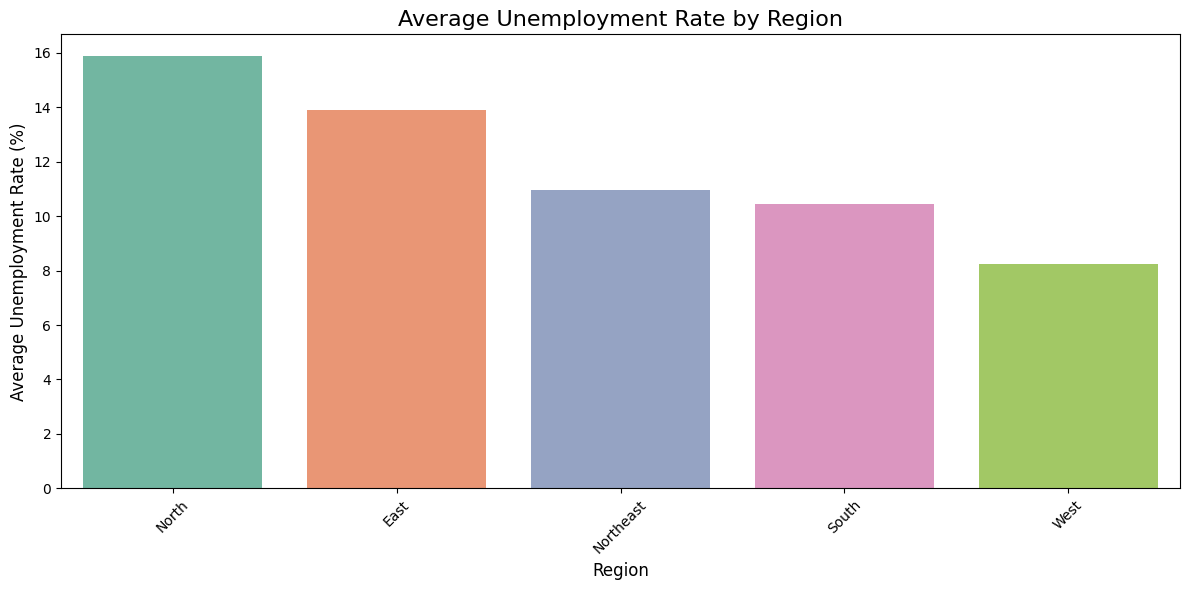

In [47]:
# average unemployment rate (region)

# Group the data by 'region' and calculate the average unemployment rate
avg_unemployment_rate = df.groupby('region')['estimated unemployment rate'].mean().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_unemployment_rate.index, y=avg_unemployment_rate.values, palette='Set2')

# Add title and labels
plt.title('Average Unemployment Rate by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Average Unemployment Rate (%)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [48]:
# Average Unemployment Rate

fig = px.bar(region,x='region',y='estimated unemployment rate',color='region',title='Average unemployment rate(region)')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [49]:
fig = px.bar(df,x='region',y='estimated unemployment rate',animation_frame='month',color='state',
            title='Unemployment rate from Jan 2020 to Oct 2020')

fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] =2000

fig.show()

In [50]:
unemployment =df.groupby(['region','state'])['estimated unemployment rate'].mean().reset_index()
unemployment.head()

,region,state,estimated unemployment rate
0,East,Bihar,19.471
1,East,Jharkhand,19.539
2,East,Odisha,6.462
3,East,West Bengal,10.192
4,North,Delhi,18.414


In [51]:
fig = px.sunburst(unemployment,path=['region','state'],values='estimated unemployment rate',
                 title ='Unemployment rate in state and region',height=600)
fig.show()

## Unemployment rate before and after Lockdown

In [52]:
# data representation before and after lockdown

before_lockdown = df[(df['month_int']>=1) &(df['month_int'] <4)]
after_lockdown = df[(df['month_int'] >=4) & (df['month_int'] <=6)]

In [53]:
af_lockdown = after_lockdown.groupby('state')['estimated unemployment rate'].mean().reset_index()

lockdown = before_lockdown.groupby('state')['estimated unemployment rate'].mean().reset_index()
lockdown['unemployment rate before lockdown'] = af_lockdown['estimated unemployment rate']

lockdown.columns = ['state','unemployment rate before lockdown','unemployment rate after lockdown']
lockdown.head()

,state,unemployment rate before lockdown,unemployment rate after lockdown
0,Andhra Pradesh,5.700000,13.750000
1,Assam,4.613333,7.070000
2,Bihar,12.110000,36.806667
3,Chhattisgarh,8.523333,9.380000
4,Delhi,18.036667,25.713333


In [54]:
# unenployment rate change after lockdown

lockdown['rate change in unemployment'] =round(lockdown['unemployment rate before lockdown']-lockdown['unemployment rate before lockdown']/lockdown['unemployment rate after lockdown'],2)

In [55]:
fig = px.bar(lockdown,x='state',y='rate change in unemployment',color='rate change in unemployment',
            title='Percentage change in Unemployment rate in each state after lockdown',template='ggplot2')
fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.show()

# Unemployment Trends

## Unemployment Rate
- The unemployment rate varies significantly across regions, ranging from **0.5%** to **75.85%**.
- Certain regions (e.g., with higher maximum unemployment rates) may require **targeted interventions** to reduce unemployment.

## Labour Participation Rate
- The labour participation rate ranges from **16.77%** to **69.69%**.
- Regions with consistently low labour participation may indicate **structural issues**, such as lack of job opportunities or barriers to workforce entry.

## Regional Disparities
- Regional groupings like **North**, **South**, **East**, **West**, and **Central** show clear disparities in unemployment and labour participation rates.
- For instance, regions with **high unemployment** often exhibit **lower labour participation rates**.

## Temporal Patterns
- Significant spikes in unemployment (e.g., in **April 2020**) suggest potential **economic shocks** or **policy changes**, likely due to **COVID-19 lockdowns**.
- Recovery trends post-lockdown can be analyzed to identify regions that **recovered faster** or **slower**.

## Geographic Insights
- Geographic coordinates can be used to **visualize unemployment spatially**, highlighting clusters of **high** or **low unemployment** regions.


# Suggested Actions

## Focus on High-Unemployment Regions
- Regions with persistently high unemployment should be prioritized for:
  - **Government schemes**
  - **Vocational training**
  - **Employment generation programs**

## Encourage Labour Force Participation
- Identify and address barriers to workforce entry, especially in regions with low labour participation rates.
- Suggested initiatives:
  - **Skilling programs** tailored to local industries.
  - **Incentives for businesses** to hire locally.

## Monitor and Support Economic Recovery
- Regions hit hardest during economic shocks (e.g., during **COVID-19**) need focused recovery plans, such as:
  - **Subsidies** or **loans** for small businesses.

## Improve Data-Driven Policies
- Use **geospatial visualizations** to target interventions precisely where they are needed, reducing inefficiencies.

## Long-Term Analysis
- Invest in **time-series forecasting models** to predict future trends in unemployment, enabling **preemptive measures**.

## Promote Regional Development
- Invest in **underdeveloped regions** to balance disparities between highly developed and less developed areas.

## Stakeholder Collaboration
- Collaborate with **regional governments** and **industries** to create localized solutions based on their specific challenges.

## Public Awareness Campaigns
- Increase awareness about:
  - Available **employment opportunities**.
  - **Government schemes** to improve labour participation.
